In [3]:
import pandas as pd
import numpy as np
emp_df=pd.read_csv(r'C:\Users\Aryaman Das\Desktop\HR-ANALYTICS-CASE-STUDY-main\employee_survey_data.csv')
emp_df.head()
#emp_df.shape
gen_df=pd.read_csv(r'C:\Users\Aryaman Das\Desktop\HR-ANALYTICS-CASE-STUDY-main\general_data.csv')
gen_df.head()
#gen_df.shape
man_df=pd.read_csv(r'C:\Users\Aryaman Das\Desktop\HR-ANALYTICS-CASE-STUDY-main\manager_survey_data.csv')
man_df.head()
gen_df=gen_df.merge(man_df,left_on='EmployeeID',right_on='EmployeeID',how='inner')
gen_df.head()
gen_df=gen_df.merge(emp_df,left_on='EmployeeID',right_on='EmployeeID',how='inner')
gen_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


DATA ANALYSING

In [4]:
gen_df.columns
gen_df.info()
gen_df.describe()
gen_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

DEALING WITH NULL VALUES :

In [5]:
gen_df['EnvironmentSatisfaction'].nunique()
gen_df.EnvironmentSatisfaction.value_counts()
gen_df['EnvironmentSatisfaction']=gen_df['EnvironmentSatisfaction'].fillna(value=3,limit=13)
gen_df.EnvironmentSatisfaction.value_counts()
gen_df['EnvironmentSatisfaction']=gen_df['EnvironmentSatisfaction'].fillna(value=4)
gen_df.EnvironmentSatisfaction.value_counts()
gen_df.isnull().sum()
gen_df['NumCompaniesWorked'].value_counts()
gen_df['NumCompaniesWorked']=gen_df['NumCompaniesWorked'].fillna(value=1)
gen_df['JobSatisfaction'].value_counts()
gen_df['JobSatisfaction']=gen_df['JobSatisfaction'].fillna(value=4,limit=12)
gen_df['JobSatisfaction']=gen_df['JobSatisfaction'].fillna(value=3)
gen_df['WorkLifeBalance'].value_counts()
gen_df['WorkLifeBalance']=gen_df['WorkLifeBalance'].fillna(value=3)
gen_df['TotalWorkingYears'].value_counts().head()
gen_df['TotalWorkingYears']=gen_df['TotalWorkingYears'].fillna(10)
gen_df.isnull().sum()
Attrition=pd.get_dummies(gen_df['Attrition'],drop_first=True)
Attrition.Yes.value_counts()
gen_df=pd.concat([gen_df,Attrition],axis=1)
gen_df.head()
gen_df=gen_df.drop(columns=['Attrition'])
gen_df=gen_df.rename(columns={'Yes': 'Attrition'})
gen_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,6,1,0,0,3,3,3.0,4.0,2.0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,3,5,1,4,2,4,3.0,2.0,4.0,1
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2,5,0,3,3,3,2.0,2.0,1.0,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,5,8,7,5,2,3,4.0,4.0,3.0,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,2,6,0,4,3,3,4.0,1.0,3.0,0


DATA VISUALIZATION :

Ratio of workers most likely to resign on the basis of Marital Status: 
 Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64
Ratio of workers most likely to resign on the basis of Gender: 
 Male      16.67
Female    15.31
Name: Gender, dtype: float64
Ratio of workers most likely to resign on the basis of Education Field: 
 Human Resources     40.74
Life Sciences       16.67
Marketing           15.72
Medical             16.16
Other               12.20
Technical Degree    11.36
Name: EducationField, dtype: float64
Ratio of workers most likely to resign on the basis of Job Level: 
 1    15.47
2    17.79
3    14.68
4    16.04
5    13.04
Name: JobLevel, dtype: float64
Ratio of workers most likely to resign on the basis of JobRole: 
 Healthcare Representative    14.50
Human Resources              13.46
Laboratory Technician        16.22
Manager                      13.73
Manufacturing Director       11.03
Research Director            23.75
Research Scien

<ipython-input-7-4ad00288e7f4>:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9,6))


Ratio of workers most likely to resign on the basis of WorkLifeBalance: 
 3.0    14.23
2.0    16.78
4.0    17.84
1.0    31.38
Name: WorkLifeBalance, dtype: float64
Ratio of workers most likely to resign on the basis of Business Travel: 
 Travel_Rarely        14.96
Travel_Frequently    24.91
Non-Travel            8.00
Name: BusinessTravel, dtype: float64
Ratio of workers most likely to resign on the basis of Department: 
 Research & Development    15.71
Sales                     15.02
Human Resources           30.16
Name: Department, dtype: float64


,Attrition,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,37.561233,9.227088,2.919708,1.0,2208.139497,2.068938,65672.595296,2.641795,15.157340,...,11.857259,2.827251,7.369019,2.234388,4.367397,2.734793,3.150041,2.776696,2.782103,2.782914
1,1,33.607595,9.012658,2.877637,1.0,2191.767932,2.037975,61682.616034,2.925457,15.481013,...,8.260197,2.654008,5.130802,1.945148,2.852321,2.704641,3.172996,2.473980,2.472574,2.662447


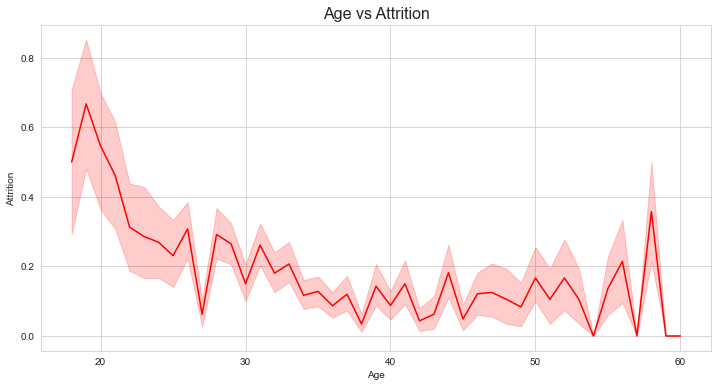

<Figure size 648x360 with 0 Axes>

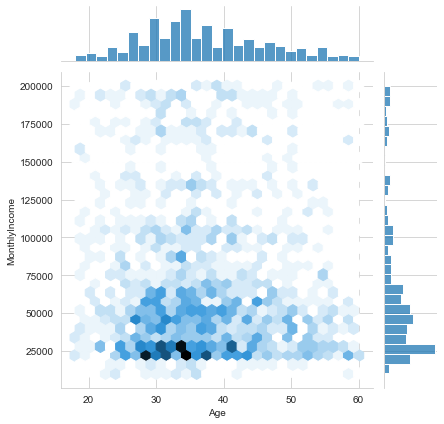

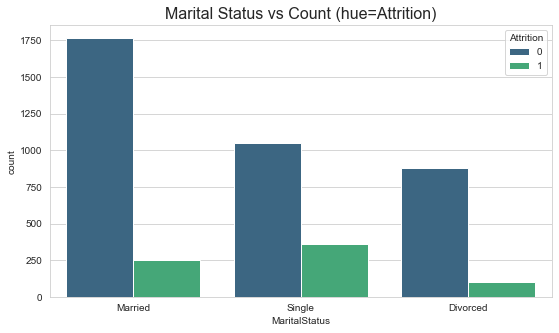

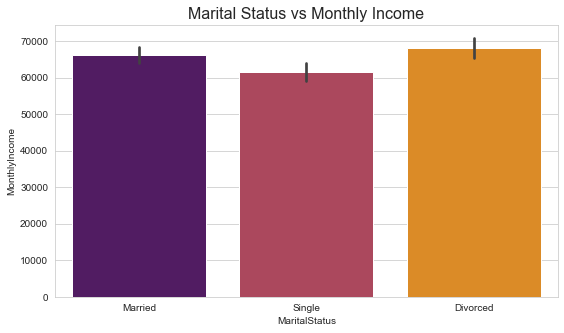

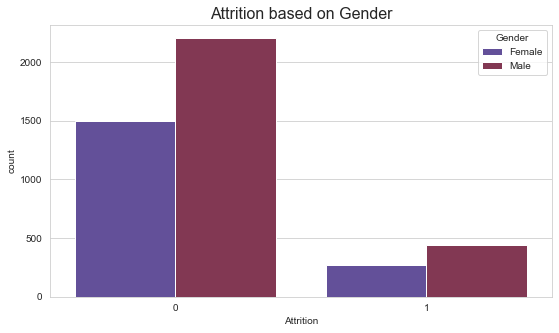

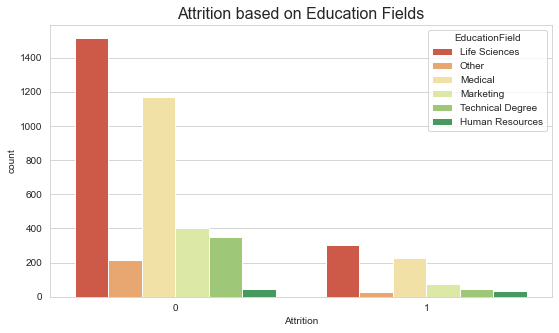

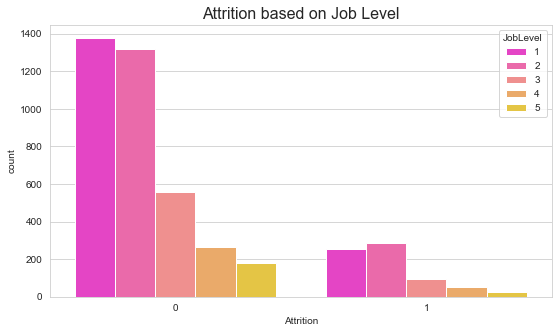

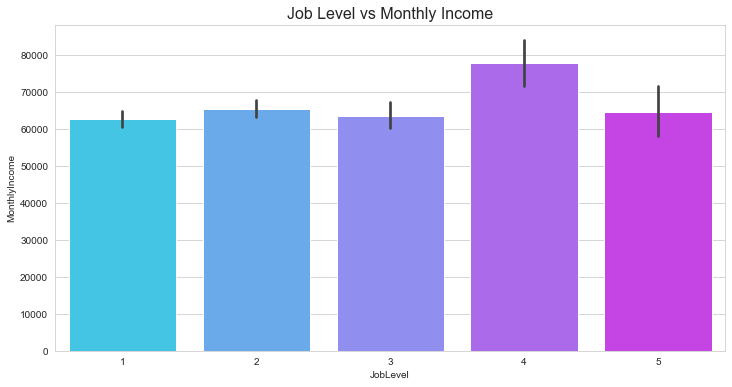

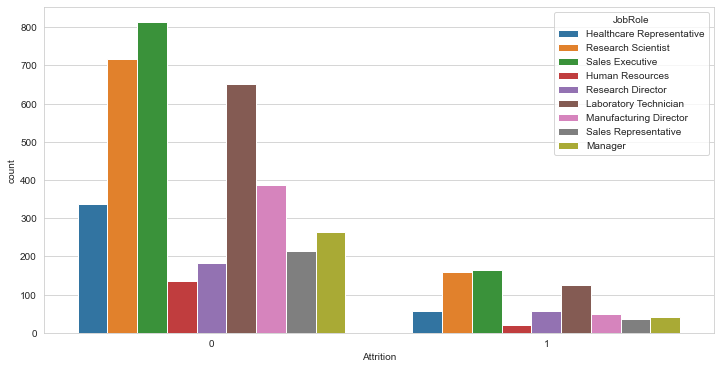

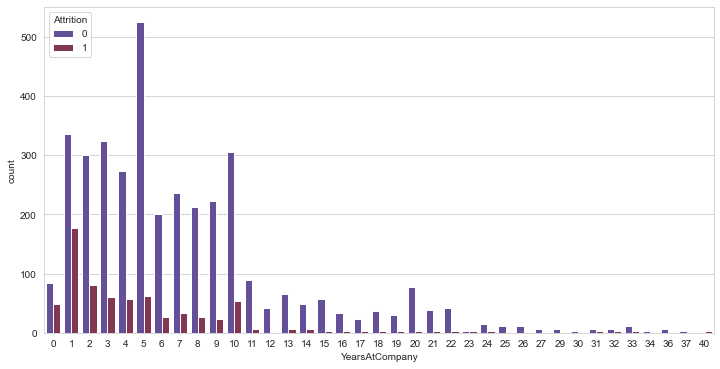

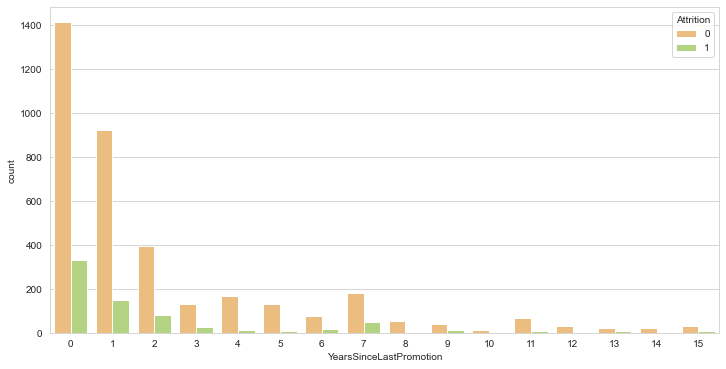

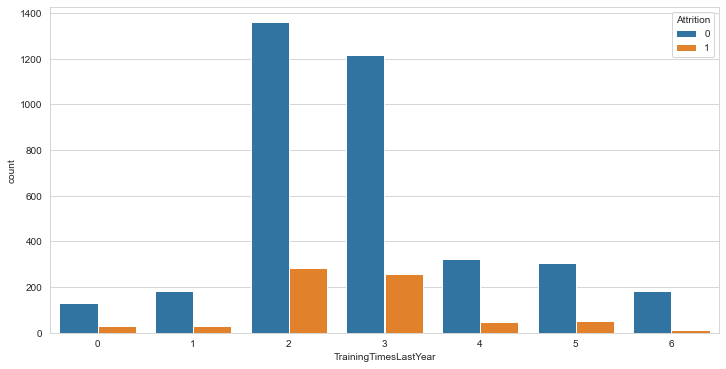

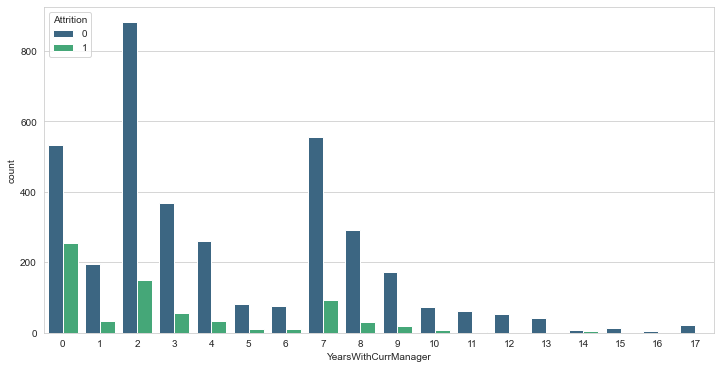

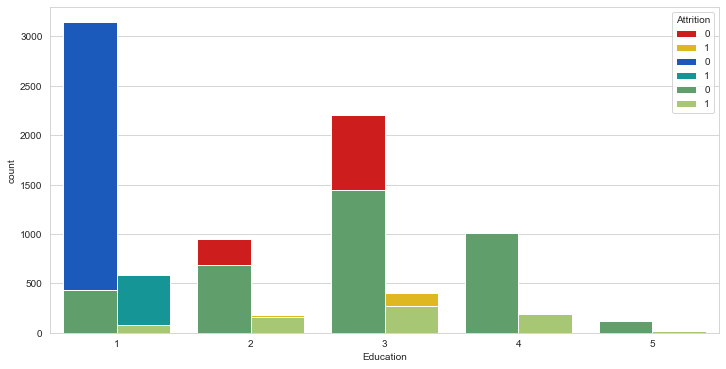

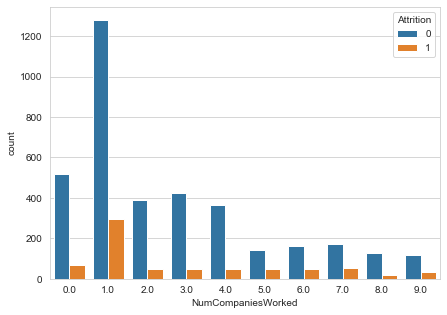

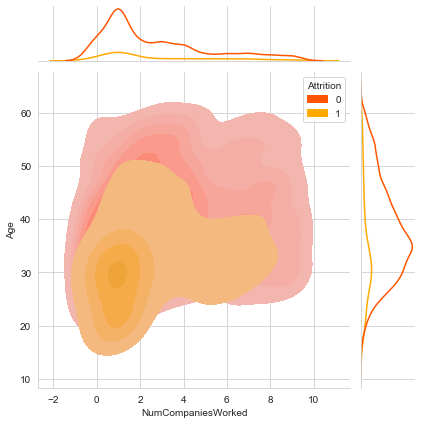

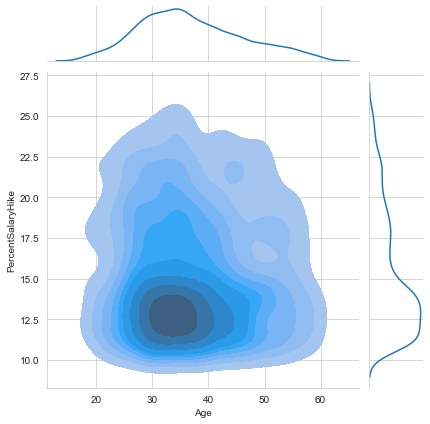

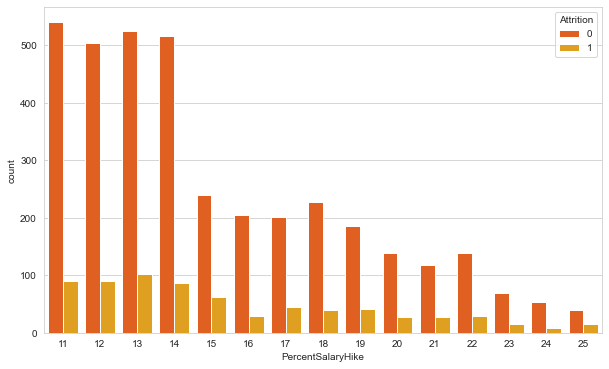

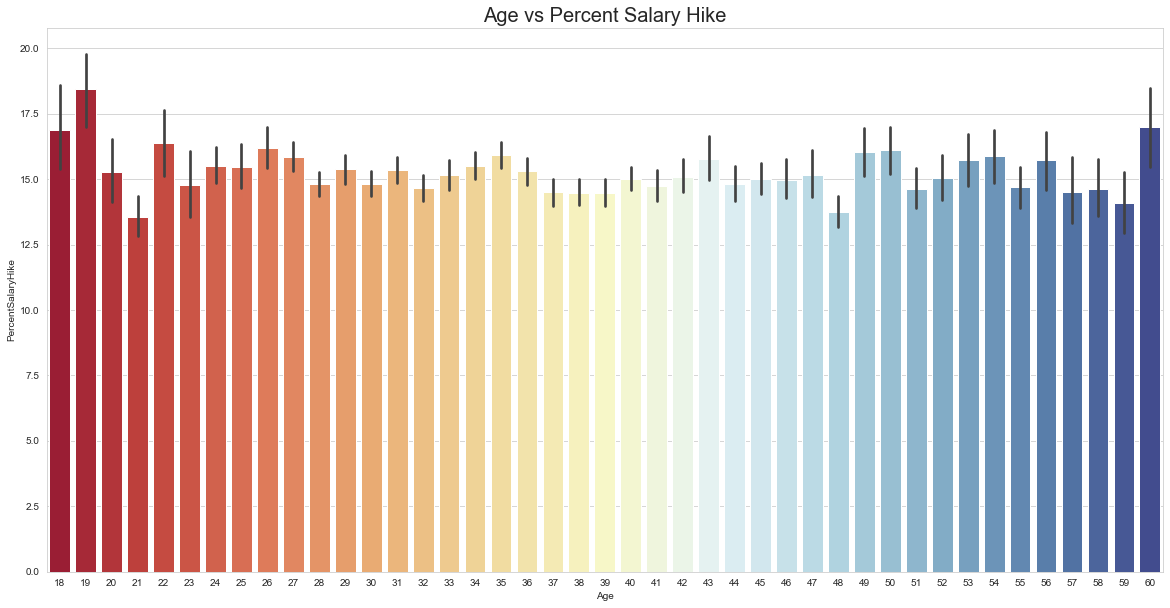

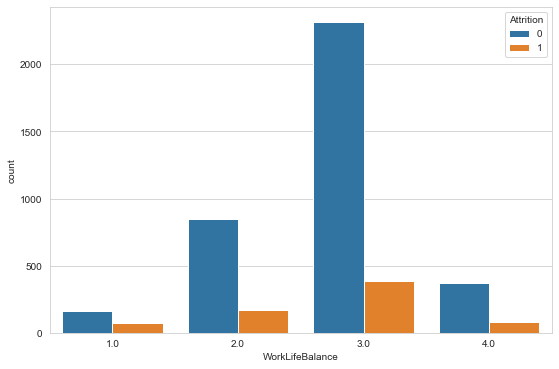

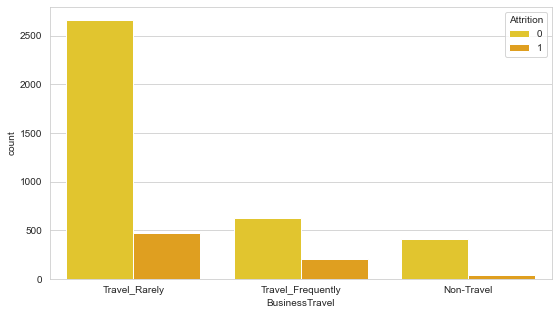

<Figure size 864x432 with 0 Axes>

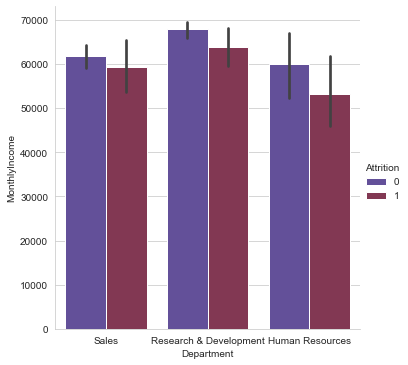

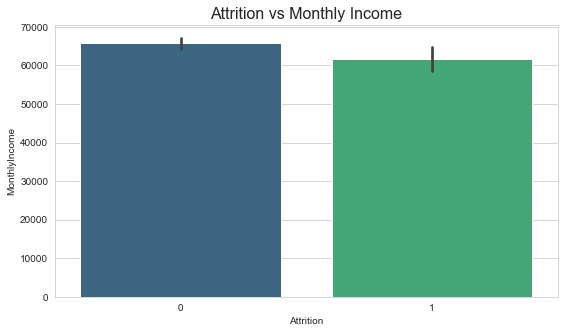

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Age vs Attrition',fontsize=16)
sns.lineplot(x='Age',y='Attrition',data=gen_df,color='red')
# Attrition can be seen more in age groups between 18-25 
plt.figure(figsize=(9,5))
sns.jointplot(x='Age',y='MonthlyIncome',data=gen_df,kind='hex')
plt.figure(figsize=(9,5))
plt.title('Marital Status vs Count (hue=Attrition)',fontsize=16)
sns.countplot(x='MaritalStatus',hue='Attrition',data=gen_df,palette='viridis')
ratio=(gen_df[gen_df['Attrition']==1]['MaritalStatus'].value_counts()/gen_df.MaritalStatus.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Marital Status: \n",round(ratio,2))
plt.figure(figsize=(9,5))
plt.title('Marital Status vs Monthly Income',fontsize=16)
sns.barplot(x='MaritalStatus',y='MonthlyIncome',data=gen_df,palette='inferno')
plt.figure(figsize=(9,5))
plt.title('Attrition based on Gender',fontsize=16)
sns.countplot(x='Attrition',hue='Gender',data=gen_df,palette='twilight')
ratio=(gen_df[gen_df['Attrition']==1]['Gender'].value_counts()/gen_df.Gender.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Gender: \n",round(ratio,2))
plt.figure(figsize=(9,5))
plt.title('Attrition based on Education Fields',fontsize=16)
sns.countplot(x='Attrition',hue='EducationField',data=gen_df,palette='RdYlGn')
ratio=(gen_df[gen_df['Attrition']==1]['EducationField'].value_counts()/gen_df.EducationField.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Education Field: \n",round(ratio,2))
gen_df.EmployeeCount.value_counts()
plt.figure(figsize=(9,5))
plt.title('Attrition based on Job Level',fontsize=16)
sns.countplot(x='Attrition',hue='JobLevel',data=gen_df,palette='spring')
ratio=(gen_df[gen_df['Attrition']==1]['JobLevel'].value_counts()/gen_df.JobLevel.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Job Level: \n",round(ratio,2))
plt.figure(figsize=(12,6))
plt.title('Job Level vs Monthly Income',fontsize=16)
sns.barplot(x='JobLevel',y='MonthlyIncome',data=gen_df,palette='cool')
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='JobRole',data=gen_df)
ratio=(gen_df[gen_df['Attrition']==1]['JobRole'].value_counts()/gen_df.JobRole.value_counts())*100
print("Ratio of workers most likely to resign on the basis of JobRole: \n",round(ratio,2))
plt.figure(figsize=(12,6))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=gen_df,palette='twilight')
plt.figure(figsize=(12,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=gen_df,palette='RdYlGn')
gen_df.TrainingTimesLastYear.value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=gen_df)
ratio=(gen_df[gen_df['Attrition']==1]['TrainingTimesLastYear'].value_counts()/gen_df.TrainingTimesLastYear.value_counts())*100
print("Ratio of workers most likely to resign on the basis of TrainingTimesLastYear: \n",round(ratio,2))
plt.figure(figsize=(12,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=gen_df,palette='viridis')
gen_df.JobInvolvement.value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='JobInvolvement',hue='Attrition',data=gen_df,palette='hot')
gen_df.PerformanceRating.value_counts()
sns.countplot(x='PerformanceRating',hue='Attrition',data=gen_df,palette='winter')
ratio=(gen_df[gen_df['Attrition']==1]['PerformanceRating'].value_counts()/gen_df.PerformanceRating.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Performance Rating: \n",round(ratio,2))
sns.countplot(x='Education',hue='Attrition',data=gen_df,palette='summer')
ratio=(gen_df[gen_df['Attrition']==1]['Education'].value_counts()/gen_df.Education.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Education: \n",round(ratio,2))
plt.figure(figsize=(7,5))
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=gen_df)
ratio=(gen_df[gen_df['Attrition']==1]['NumCompaniesWorked'].value_counts()/gen_df.NumCompaniesWorked.value_counts())*100
print("Ratio of workers most likely to resign on the basis of NUMBER OF COMPANIES WORKED: \n",round(ratio,2))
sns.jointplot(x='NumCompaniesWorked',y='Age',data=gen_df,hue='Attrition',kind='kde',shade=True,palette='autumn')
sns.jointplot(x='Age',y='PercentSalaryHike',data=gen_df,kind='kde',shade=True)
plt.figure(figsize=(10,6))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=gen_df,palette='autumn')
ratio=(gen_df[gen_df['Attrition']==1]['PercentSalaryHike'].value_counts()/gen_df.PercentSalaryHike.value_counts())*100
print("Ratio of workers most likely to resign on the basis of PercentSalaryHike: \n",round(ratio,2))
plt.figure(figsize=(20,10))
plt.title('Age vs Percent Salary Hike',fontsize=20)
sns.barplot(y='PercentSalaryHike',x='Age',data=gen_df,palette='RdYlBu')
plt.figure(figsize=(9,6))
sns.countplot(x='WorkLifeBalance',data=gen_df,hue='Attrition')
ratio=(gen_df[gen_df['Attrition']==1]['WorkLifeBalance'].value_counts()/gen_df.WorkLifeBalance.value_counts())*100
print("Ratio of workers most likely to resign on the basis of WorkLifeBalance: \n",round(ratio,2))
gen_df['BusinessTravel'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=gen_df,palette='Wistia')
ratio=(gen_df[gen_df['Attrition']==1]['BusinessTravel'].value_counts()/gen_df.BusinessTravel.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Business Travel: \n",round(ratio,2))
plt.figure(figsize=(12,6))
#plt.tight_layout()
sns.catplot(x='Department',y='MonthlyIncome',data=gen_df,hue='Attrition',kind='bar',palette='twilight')
ratio=(gen_df[gen_df['Attrition']==1]['Department'].value_counts()/gen_df.Department.value_counts())*100
print("Ratio of workers most likely to resign on the basis of Department: \n",round(ratio,2))
#sns.countplot(x='PerformanceRating',hue='Attrition',data=gen_df)
plt.figure(figsize=(9,5))
plt.title('Attrition vs Monthly Income',fontsize=16)
sns.barplot(x='Attrition',y='MonthlyIncome',data=gen_df,palette='viridis')
est=gen_df.groupby('Attrition',as_index=False).mean()
est.head()

CREATING DUMMY VARIABLES :


In [8]:
gen_df=gen_df.drop(columns=['EmployeeID'])
gen_df.info()
gen_df.BusinessTravel.value_counts()
BusinessTravel=pd.get_dummies(gen_df['BusinessTravel'],drop_first=True)
BusinessTravel.head()
Department=pd.get_dummies(gen_df['Department'],drop_first=True)
Department.head()
gen_df.Department.value_counts()
gen_df.EducationField.value_counts()
EducationField=pd.get_dummies(gen_df['EducationField'],drop_first=True)
EducationField.head()
Gender=pd.get_dummies(gen_df['Gender'],drop_first=True)
Gender.head()
JobRole=pd.get_dummies(gen_df['JobRole'],drop_first=False)
JobRole.head()
MaritalStatus=pd.get_dummies(gen_df['MaritalStatus'],drop_first=True)
MaritalStatus.head()
gen_df.MaritalStatus.value_counts()
Over18=pd.get_dummies(gen_df['Over18'],drop_first=False)
Over18.head()
gen_df.Over18.value_counts()
gen_df=gen_df.drop(columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18'])
gen_df=pd.concat([gen_df,BusinessTravel],axis=1)
gen_df=pd.concat([gen_df,Department],axis=1)
gen_df=pd.concat([gen_df,EducationField],axis=1)
gen_df=pd.concat([gen_df,Gender],axis=1)
gen_df=pd.concat([gen_df,JobRole],axis=1)
gen_df=pd.concat([gen_df,MaritalStatus],axis=1)
gen_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   object 
 14  PercentSalaryHike       

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,51,6,2,1,1,131160,1.0,11,8,0,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,1,41890,0.0,23,8,1,...,0,0,0,0,0,1,0,0,0,1
2,32,17,4,1,4,193280,1.0,15,8,3,...,0,0,0,0,0,0,1,0,1,0
3,38,2,5,1,3,83210,3.0,11,8,3,...,1,0,0,0,0,0,0,0,1,0
4,32,10,1,1,1,23420,4.0,12,8,2,...,0,0,0,0,0,0,1,0,0,1


LOGISTIC REGRESSION :

Data Attrition Yes/No Percentage:
 ---------------------------------------- 
 16.122448979591837 %
Test Accuracy: 0.8458549222797928
Test Sensitivity: 0.19607843137254902
[[1256   33]
 [ 205   50]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1289
           1       0.60      0.20      0.30       255

    accuracy                           0.85      1544
   macro avg       0.73      0.59      0.60      1544
weighted avg       0.82      0.85      0.81      1544



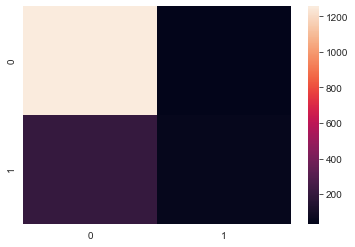

In [9]:
balance = (gen_df.Attrition.value_counts()[1]/gen_df.Attrition.shape[0])*100
print('Data Attrition Yes/No Percentage:\n','--'*20,'\n', balance,'%')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = gen_df.drop(columns=['Attrition','EmployeeCount'], axis = 1) #feature matrix
y = gen_df.Attrition # target vector

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.35, random_state=111)
log=LogisticRegression()

log.fit(X_train, y_train)

# predictions for test set
y_preds = log.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_preds)
test_recall = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy)
print('Test Sensitivity:', test_recall)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))